In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing sklearn libraries for training the dataset
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import precision_score,recall_score, accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [2]:
df= pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
features= ['sex','fbs','restecg','exng','slp','thall','age', 'trtbps','chol', 'thalachh','oldpeak']
label= 'output'

In [7]:
#separating the features(X) and lables(y)
X,y=df[features].values,df[label].values

In [8]:
for n in range(0,4):
    print("Patient", str(n+1),"\n Features:", list(X[n]),"\n Label:", y[n])

Patient 1 
 Features: [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 63.0, 145.0, 233.0, 150.0, 2.3] 
 Label: 1
Patient 2 
 Features: [1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 37.0, 130.0, 250.0, 187.0, 3.5] 
 Label: 1
Patient 3 
 Features: [0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 41.0, 130.0, 204.0, 172.0, 1.4] 
 Label: 1
Patient 4 
 Features: [1.0, 0.0, 1.0, 0.0, 2.0, 2.0, 56.0, 120.0, 236.0, 178.0, 0.8] 
 Label: 1


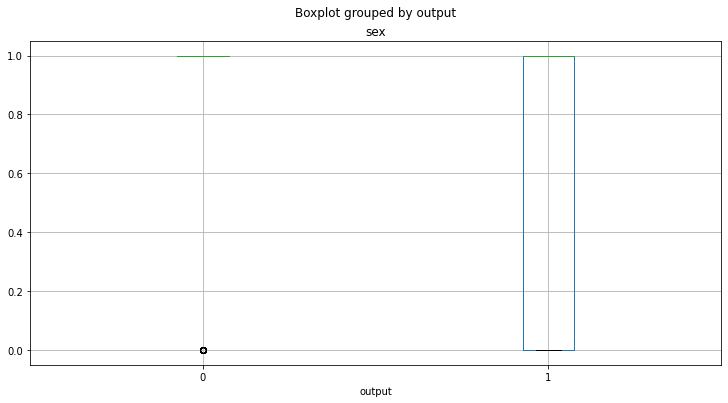

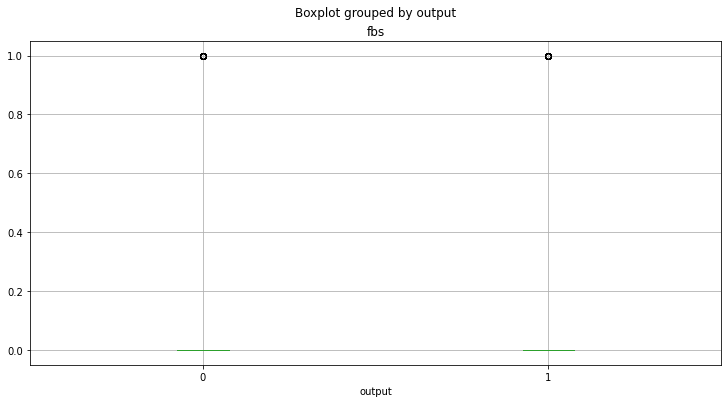

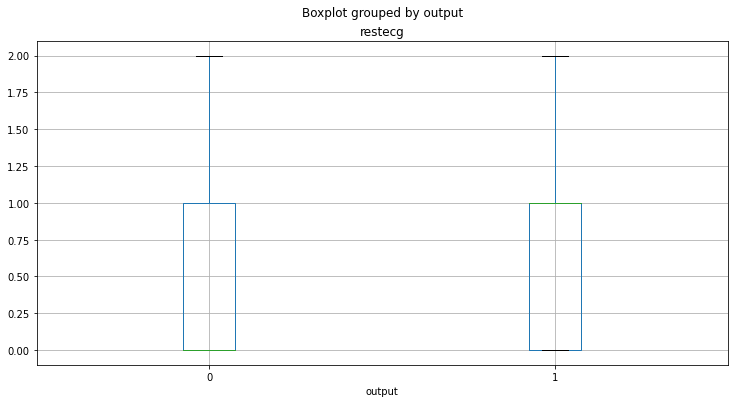

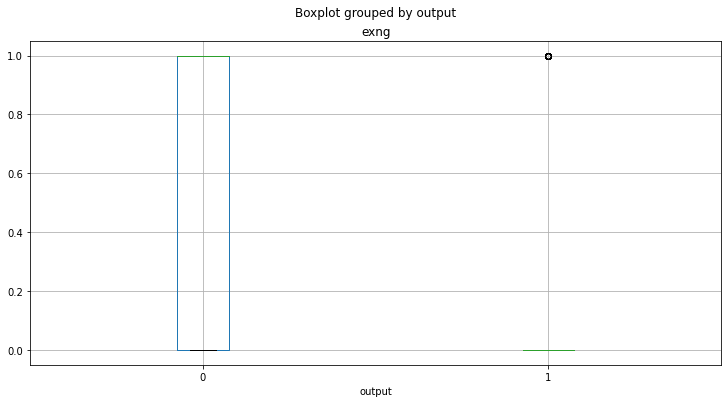

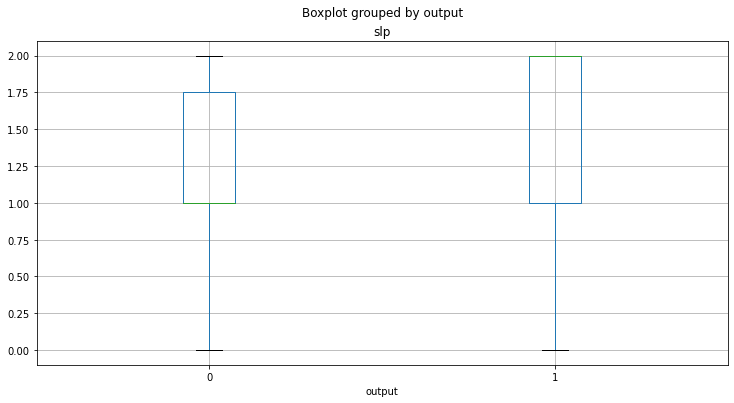

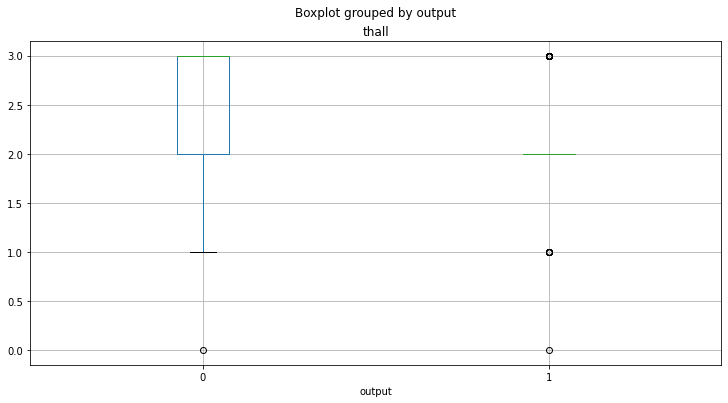

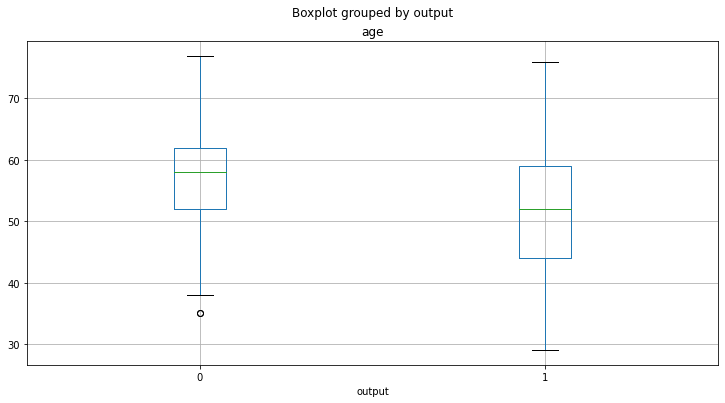

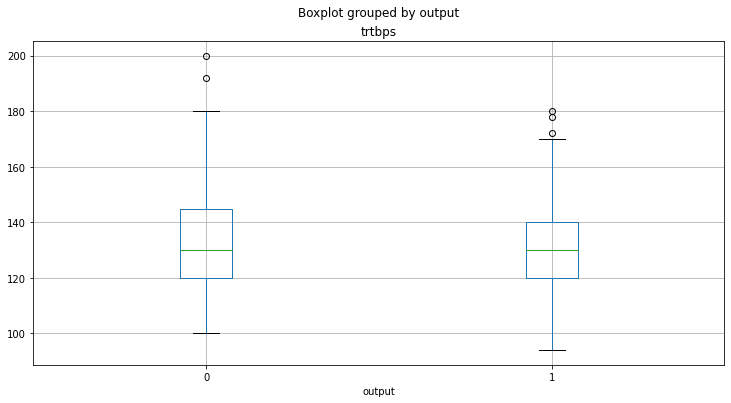

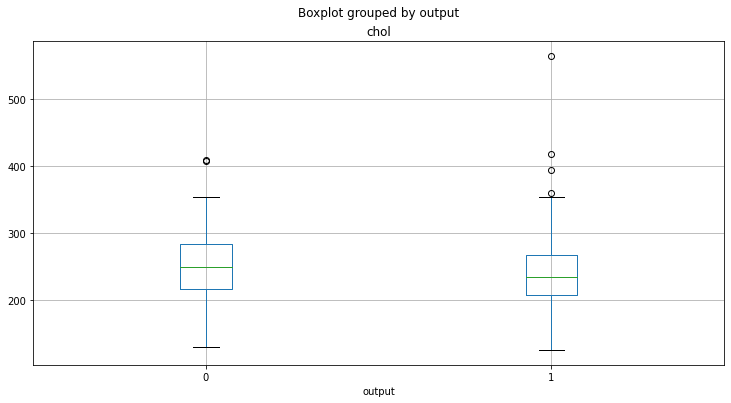

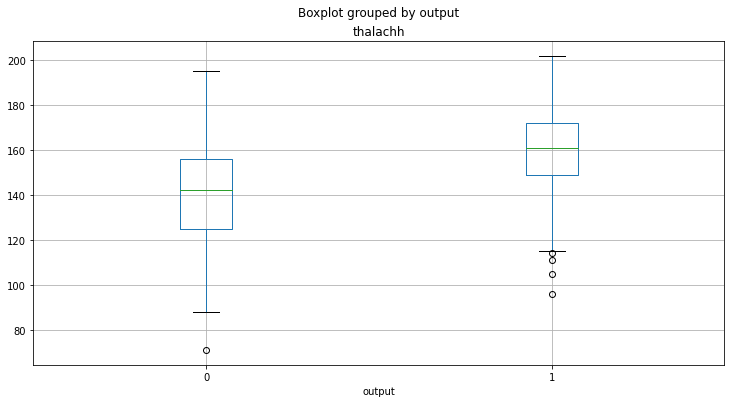

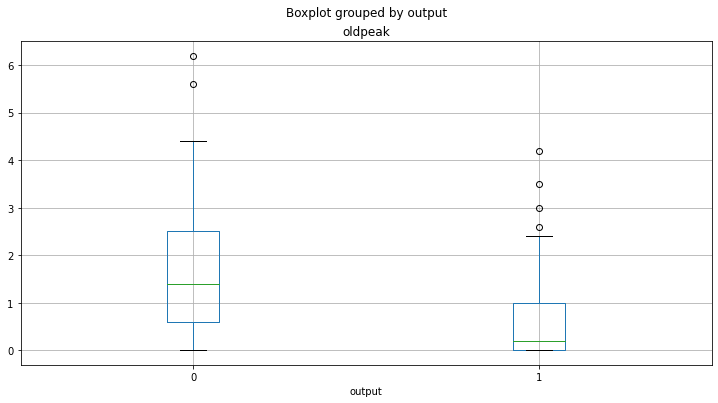

In [9]:
for col in features:
    df.boxplot(column=col,by='output',figsize=(12,6))
    plt.title(col)
plt.show()

In [10]:
#splitting the data into 70-30% into training and test dataset
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=40)
print('Training set: %d rows\nTest set: %d rows' %(X_train.shape[0],X_test.shape[0]))

Training set: 212 rows
Test set: 91 rows


Now we have splitted the data into four datasets:
- **X_train**: The feature values- use to train the model
- **y_train**: The corresponding labels- use to train the model
- **X_test**: The feature values- used to validate the model
- **y_test**: The corresponding labels- used to validate the model

In [11]:
#Training and evaluating the binary classification the model
reg=0.01
model= LogisticRegression(C=1/reg,solver='liblinear').fit(X_train,y_train)
print(model,"\n")

LogisticRegression(C=100.0, solver='liblinear') 



In [12]:
#evaluate the model using the test data
predictions= model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual label: ',y_test)

Predicted labels:  [1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1]
Actual label:  [1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1]


- As the arrays of labels are too long so we will go with checking the accuracy of the predictions

In [13]:
print('Accuracy score: ', accuracy_score(y_test,predictions))

Accuracy score:  0.8241758241758241


### Performing classification report

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.79        40
           1       0.83      0.86      0.85        51

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [15]:
#Evaluating the precision and recall score
print("Overall Precision: ", precision_score(y_test,predictions))
print("Overall Recall: ", recall_score(y_test,predictions))

Overall Precision:  0.8301886792452831
Overall Recall:  0.8627450980392157


### Performing the confusion matrix

In [16]:
cm= confusion_matrix(y_test,predictions)
print(cm)

[[31  9]
 [ 7 44]]


**Note**: Statistical machine learning algorithms like logistic regression are based on probability. To see the probability pairs we will use **predict_proba**

**Setting the threshold values**
A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5)

In [17]:
y_scores= model.predict_proba(X_test)
print(y_scores)

[[0.29192693 0.70807307]
 [0.23934648 0.76065352]
 [0.02055464 0.97944536]
 [0.28738053 0.71261947]
 [0.12724245 0.87275755]
 [0.16067977 0.83932023]
 [0.79418581 0.20581419]
 [0.97479523 0.02520477]
 [0.92415351 0.07584649]
 [0.0519827  0.9480173 ]
 [0.83516099 0.16483901]
 [0.26505239 0.73494761]
 [0.04477133 0.95522867]
 [0.98570471 0.01429529]
 [0.56458288 0.43541712]
 [0.45304866 0.54695134]
 [0.81422404 0.18577596]
 [0.18522032 0.81477968]
 [0.54823798 0.45176202]
 [0.96246049 0.03753951]
 [0.03556191 0.96443809]
 [0.21352211 0.78647789]
 [0.78645628 0.21354372]
 [0.14631819 0.85368181]
 [0.95261266 0.04738734]
 [0.01418198 0.98581802]
 [0.82613583 0.17386417]
 [0.19401495 0.80598505]
 [0.34804206 0.65195794]
 [0.1890972  0.8109028 ]
 [0.31242906 0.68757094]
 [0.90750767 0.09249233]
 [0.7653198  0.2346802 ]
 [0.0832921  0.9167079 ]
 [0.11373702 0.88626298]
 [0.13127642 0.86872358]
 [0.96155013 0.03844987]
 [0.66451456 0.33548544]
 [0.64983019 0.35016981]
 [0.68215834 0.31784166]


### Plotting the ROC curve
- The decision to score a predictions as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared.
- If we'll change the threshold, it would affect the predictions along with change in the confusion matrix.
- To evaluate a classifier with true positive rate and false positive rate for a range of possible thresholds- we'll form a chart known as *received operator characteristic* **(ROC)**

In [18]:
from sklearn.metrics import roc_curve, confusion_matrix
fpr, tpr, threshold= roc_curve(y_test,y_scores[:,1])

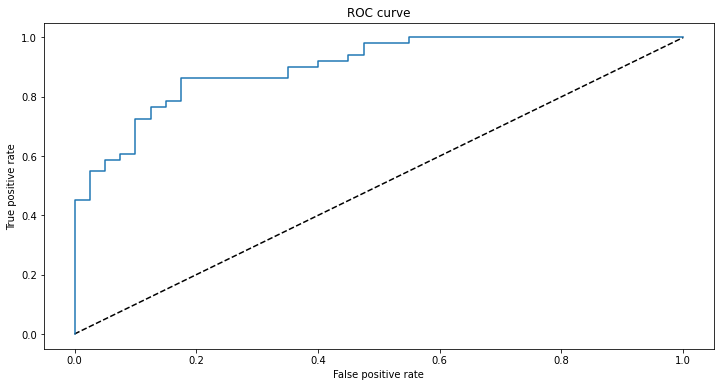

In [19]:
#plotting the ROC curve
fig= plt.figure(figsize=(12,6))
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

- For better performance of the model instead of using ROC curve, we'll use, **Area Under the Curve(AUC)**- is a value 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. 

In [20]:
from sklearn.metrics import roc_auc_score

auc= roc_auc_score(y_test,y_scores[:,1])
print('Area under the curve: '+ str(auc))

Area under the curve: 0.9009803921568628
